In [2]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Cross-Validation and Bias-Variance decomposition
## Cross-Validation
Implementing 4-fold cross-validation below:

In [3]:
from helpers import load_data

# load dataset
x, y = load_data()

In [4]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval]
                 for k in range(k_fold)]
    return np.array(k_indices)

In [5]:
seed = 1
k_fold = 4
k_ind = build_k_indices(y, k_fold, seed)

In [19]:
from costs import compute_mse
from ridge_regression import ridge_regression
from build_polynomial import build_poly

def cross_validation(y, x, k_indices, k, lambda_, degree):
    """return the loss of ridge regression."""
    k_fold = list(range(k_indices.shape[0]))
    k_fold.remove(k)
    indices_tr = k_indices[k_fold].ravel()
    y_tr = y[indices_tr]
    x_tr = x[indices_tr]
    y_te = y[k_indices[k]]
    x_te = x[k_indices[k]]
    # ***************************************************
    # INSERT YOUR CODE HERE
    # get k'th subgroup in test, others in train: TODO
    # ***************************************************
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form data with polynomial degree: TODO
    # ***************************************************
    Phi_tr = build_poly(x_tr, degree)
    Phi_te = build_poly(x_te, degree)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ridge regression: TODO
    # ***************************************************
    w_tr = ridge_regression(y_tr, Phi_tr, lambda_)
    loss_tr = compute_mse(y_tr, Phi_tr, w_tr)
    loss_te = compute_mse(y_te, Phi_te, w_tr)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate the loss for train and test data: TODO
    # ***************************************************
    return loss_tr, loss_te

[autoreload of build_polynomial failed: Traceback (most recent call last):
  File "/home/huguenin/anaconda3/lib/python3.5/site-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
  File "/home/huguenin/ML_project1/labs/ex04/template/build_polynomial.py", line 7
    polynomial basis function.
                   ^
SyntaxError: invalid syntax
]


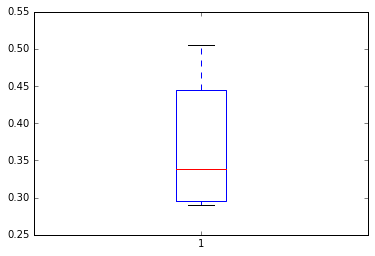

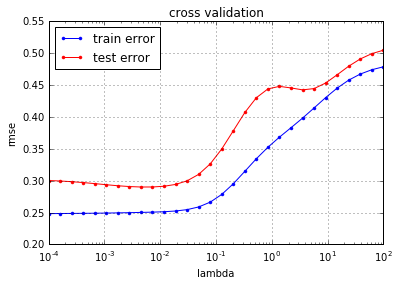

In [20]:
from plots import cross_validation_visualization

def cross_validation_demo():
    seed = 1
    degree = 7
    k_fold = 4
    lambdas = np.logspace(-4, 2, 30)
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
    k_list = list(range(k_fold))
    for lamb in lambdas:
        tot_loss_tr = 0
        tot_loss_te = 0
        for k in k_list:
            loss_tr, loss_te = cross_validation(y, x, k_indices, k, lamb, degree)
            tot_loss_tr += loss_tr
            tot_loss_te += loss_te
            #print(tot_loss_tr, tot_loss_te)
        rmse_tr.append(np.sqrt(2/k_fold * tot_loss_tr))
        rmse_te.append(np.sqrt(2/k_fold * tot_loss_te))
    # ***************************************************
    # INSERT YOUR CODE HERE
    # cross validation: TODO
    # ***************************************************  
    plt.boxplot(rmse_te)
    plt.show()
    cross_validation_visualization(lambdas, rmse_tr, rmse_te)

cross_validation_demo()

## Bias-Variance Decomposition
Visualize bias-variance trade-off by implementing the function `bias_variance_demo()` below:

In [21]:
from least_squares import least_squares
from split_data import split_data
from plots import bias_variance_decomposition_visualization

def bias_variance_demo():
    """The entry."""
    # define parameters
    seeds = range(100)
    num_data = 10000
    ratio_train = 0.005
    degrees = range(1, 10)
    
    # define list to store the variable
    rmse_tr = np.empty((len(seeds), len(degrees)))
    rmse_te = np.empty((len(seeds), len(degrees)))
    
    for index_seed, seed in enumerate(seeds):
        np.random.seed(seed)
        x = np.linspace(0.1, 2 * np.pi, num_data)
        y = np.sin(x) + 0.3 * np.random.randn(num_data).T
        # ***************************************************
        # INSERT YOUR CODE HERE
        # split data with a specific seed: TODO
        # ***************************************************
        x_tr, y_tr, x_te, y_te = split_data(x, y, ratio_train, seed)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # bias_variance_decomposition: TODO
        # ***************************************************
        Phi_tr_comp = build_poly(x_tr, 9)
        Phi_te_comp = build_poly(x_te, 9) 
        for degree in degrees:
            Phi_tr = Phi_tr_comp[:,:degree+1]
            Phi_te = Phi_te_comp[:,:degree+1]
            mse_tr, w_tr = least_squares(y_tr, Phi_tr)
            mse_te = compute_mse(y_te, Phi_te, w_tr)
            rmse_tr[index_seed, degree-1] = np.sqrt(2*mse_tr)
            rmse_te[index_seed, degree-1] = np.sqrt(2*mse_te)
            print(seed, " ", degree)
    bias_variance_decomposition_visualization(degrees, rmse_tr, rmse_te)

bias_variance_demo()

/home/huguenin/ML_project1/labs/ex04/template/split_data.py:24: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  x_tr = x[0:ratio]
/home/huguenin/ML_project1/labs/ex04/template/split_data.py:25: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  x_te = x[ratio:len(x)]
/home/huguenin/ML_project1/labs/ex04/template/split_data.py:26: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y_tr = y[0:ratio]
/home/huguenin/ML_project1/labs/ex04/template/split_data.py:27: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y_te = y[ratio:len(y)]


0   1
0   2
0   3
0   4
0   5
0   6
0   7
0   8
0   9
1   1
1   2
1   3
1   4
1   5
1   6
1   7
1   8
1   9
2   1
2   2
2   3
2   4
2   5
2   6
2   7
2   8
2   9
3   1
3   2
3   3
3   4
3   5
3   6
3   7
3   8
3   9
4   1
4   2
4   3
4   4
4   5
4   6
4   7
4   8
4   9
5   1
5   2
5   3
5   4
5   5
5   6
5   7
5   8
5   9
6   1
6   2
6   3
6   4
6   5
6   6
6   7
6   8
6   9


KeyboardInterrupt: 